# Inferential statistics
## Part III - Inferential Analysis

We're now going to look for answers to the ongoing basketball discussions between you and your family. The main ones we want to reasearch are the following:

- Your grandmother says that your sister couldn't play in a professional basketball league (not only the WNBA, but ANY professional basketball league) because she's too skinny and lacks muscle.
- Your sister says that most female professional players fail their free throws.
- Your brother-in-law heard on the TV that the average assists among NBA (male) and WNBA (female) players is 52 for the 2016-2017 season. He is convinced this average would be higher if we only considered the players from the WNBA.

Let's investigate these claims and see if we can find proof to refute or support them.

### Libraries
Import the necessary libraries first.

In [3]:
# Libraries
import math
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
from scipy.stats import ttest_1samp
pd.set_option('max_columns', 50)
import statsmodels.stats.api as sms
from scipy.stats import f_oneway
from scipy.stats import norm
import seaborn as sns

### Load the dataset

Load the cleaned dataset.

In [5]:
#your code here
wnba = pd.read_csv('/Users/erinberardi/Erin_dataV2-labs/module-2/M2-mini-project2/data/wnba_clean.csv')

# Question 1: Can my sister play in a professional female basketball league?

As we said, you grandmother is convinced that your sister couldn't play in a professional league because of her physique and weight (her weight is 67kg). 

To find an actual answer to the question we first need to know what's the average weight of a professional female basketball player. The data we have only refers to the WNBA league and not to every female professional basketball league in the world, therefore we have no way of actually calculating it.

Still, given that we do have *some* data we can **infer** it using a sample of players like the one we have. 

**How would you do it? Try and think about the requirements that your sample must satisfy in order to be used to infer the average weight. Do you feel it actually fulfills those requirements? Do you need to make any assumptions? We could calculate a confidence interval to do the inference, but do you know any other ways?**

In [6]:
# your answer here
print (wnba['Weight'].mean())
#Ho = Granny's theory.  My sister is too small for prof. basketball
#H1 = My sister is not too small.

stat_value,pvalue=ttest_1samp(wnba['Weight'],67)

print (pvalue)

'''
The p-value is well under .05, so I could infer that a weight of 67 would be acceptable'''


78.97887323943662
7.635325397241363e-26


'\nThe p-value is well under .05, so I could infer that a weight of 67 would be acceptable'

**Now that all the requirements have been taken into account, compute the confidence interval of the average weight with a confidence level of 95%.**

In [40]:
# your code here

# n= len(wnba['Weight'])
# sms.proportion_confint(n*p,n)

p = .95
mean = wnba['Weight'].mean()
std = wnba['Weight'].std()

lowb,highb = norm.interval(p,loc=mean,scale = std)

print (lowb)
print (highb)



def mean_confidence_interval(data, confidence=0.95):
    a = 1.0 * np.array(data)
    n = len(a)
    m, se = np.mean(a), stats.sem(a)
    h = se * stats.t.ppf((1 + confidence) / 2., n-1)
    return m, m-h, m+h


mean_confidence_interval(wnba['Weight'])

57.42689286914671
100.53085360972653


(78.97887323943662, 77.15461406720749, 80.80313241166576)

**What can you say about these results?**

In [30]:
#your-answer-here
'''I can say with 95% confidence that the weights of WNBA players will
fall between 57kg and 100kg.  So my sister's weight of 67 kg is very possible.
'''

"I can say with 95% confidence that the weights of WNBA players will\nfall between 57kg and 100kg.  So my sister's weight of 67 kg is very possible.\n"

**If your sister weighs 67kg what would you tell your grandmother in regards to her assumption?**

In [31]:
#your-answer-here
'''
I would tell Grammy that there may be many other reasons why my
sister cannot play in the WNBA, but that she is most likely wrong about
it being her size.'''


'\nI would tell Grammy that there may be many other reasons why my\nsister cannot play in the WNBA, but that she is most likely wrong about\nit being her size.'

## Bonus: Can you plot the probability distribution of the average weight, indicating where the critical region is?

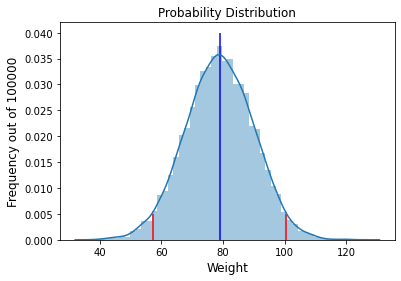

In [59]:
# your code here
p=.95
mean = wnba['Weight'].mean()
std = wnba['Weight'].std()

normal_dist = np.random.normal(size=10000, loc=mean, scale=std) 
values = pd.Series(normal_dist)

sns.distplot(values)
plt.xlabel('Weight', fontsize=12)
plt.ylabel('Frequency out of 100000', fontsize=12)
plt.title('Probability Distribution')


lowb,highb = norm.interval(p,loc=mean,scale=std)

plt.vlines(lowb,ymin=0, ymax=.005,color = 'r')
plt.vlines(highb,ymin=0, ymax=.005, color = 'r')
plt.vlines(mean,ymin=0, ymax= .04, color = 'b')


[]

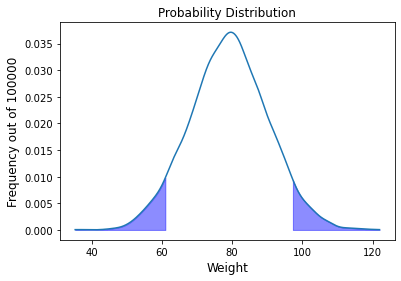

In [11]:
normal_dist = np.random.normal(size=10000, loc=wnba['Weight'].mean(), scale=wnba['Weight'].std()) 
values = pd.Series(normal_dist)

kde = stats.gaussian_kde(values)
pos = np.linspace(np.min(values), np.max(values), 10000)
plt.plot(pos, kde(pos))
plt.xlabel('Weight', fontsize=12)
plt.ylabel('Frequency out of 100000', fontsize=12)
plt.title('Probability Distribution')

a05pos = np.mean(values) + np.std(values)*1.645
a05neg = np.mean(values) - np.std(values)*1.645

shade = np.linspace(a05pos, normal_dist.max(), 300)
plt.fill_between(shade, kde(shade), alpha=0.45, color='blue')

shade2 = np.linspace(a05neg, normal_dist.min(), 300)
plt.fill_between(shade2, kde(shade2), alpha=0.45, color='blue')


plt.plot()

# Question 2: Do female professional basketball players fail the majority of their free throws?

You do not agree with your sister when she says that most female players fail their free throws. You decide to try and estimate the percentage of players that fail more than 40% of their free throws using, you guessed it, the WNBA sample.

**How would you do it? Try and think about the requirements that your sample must satisfy in order to be used to infer the proportion of players that miss more than 40% of their free throws. Do you feel it actually fulfills those requirements? Do you need to make any assumptions?**

In [41]:
# your answer here
'''
I am making an assumption to only use players who have played in a game and attempted a free throw
'''
ft_table = wnba.pivot_table(index = ('MIN','FTA'),values = 'FT%')
ft_table
ft_taken = ft_table[(ft_table != 0).all(1)] 
ft_taken

FT%
MIN  FTA      
16   2    50.0
32   11   72.7
50   4    75.0
     10   80.0
59   4    75.0
...        ...
948  148  87.2
952  135  81.5
     171  79.5
996  94   83.0
1018 186  90.3

[137 rows x 1 columns]

**Now that all the requirements have been taken into account, compute the confidence interval of the proportion with a confidence level of 95%:**

In [53]:
# your code here
#sms.DescrStatsW(ft_taken['FT%']).zconfint_mean()

p=ft_taken['FT%'].mean()
n = len(ft_taken)
print (p)
sem = stats.sem(ft_taken['FT%'])
print(sem)
tstar = 1.96

lowb,highb =sms.proportion_confint(p, n, alpha=0.95, method='normal')

# print(lowb)
# print(highb)

lcb = p-tstar*sem
ucb = p+tstar*sem

print(lcb,ucb)
#Ho = wnba players miss more than 40% of their Free Throws or MAKE less than 60%
#H1 = do not miss more than 40% of their Free Throws

# p = .95

# mean1 = ft_taken['FT%'].mean()
# #std = ft_taken['FT%'].std()
# sem = stats.sem(ft_taken['FT%'])

# lowb,highb = norm.interval(p,loc=mean1,scale = sem)

# print (lowb)
# print(highb)

78.59635036496351
1.0003935511327782
76.63557900474326 80.55712172518376


**What can you comment about our result? What would you tell your sister?**

In [44]:
#your-answer-here
'''
I would tell my sister, with 95% confidence, that most of the WNBA players
have a Free Throw percent made between 76 and 80. '''

'\nI would tell my sister, with 95% confidence, that most of the WNBA players\nhave a Free Throw percent made between 76 and 80. '

# Bonus: Can you plot the probability distribution of the proportion of missed free throws, indicating where the critical region is?

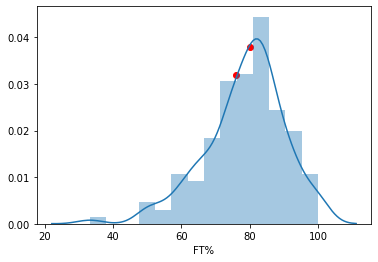

In [52]:
#your code here
wnba.shape
sns.distplot(ft_taken['FT%'])
plt.scatter(x=76,y=0.032,color = 'r')
plt.scatter(x=80,y=0.038,color = 'r')


# p=0.95
# mean = ft_taken['FT%'].mean()
# std = ft_taken['FT%'].std()

# normal_dist = np.random.normal(size=10000, loc=mean, scale=std) 
# values = pd.Series(normal_dist)

# sns.distplot(values)
# plt.xlabel('FT%', fontsize=12)
# plt.ylabel('Frequency out of 100000', fontsize=12)
# plt.title('Probability Distribution')


# lowb,highb = norm.interval(p,loc=mean,scale=std)

# plt.vlines(lowb,ymin=0, ymax=.005,color = 'r')
# plt.vlines(highb,ymin=0, ymax=.005, color = 'r')
# plt.vlines(mean, ymin=0, ymax = .035, color = 'b')

# print(mean,std)





# Question 3: Is the average number of assists for WNBA players only higher than the average for WNBA and NBA players together?

Your brother-in-law is convinced that the average assists for female professional players is higher than the average of both female and male players combined (which is 52 for the 2016-2017 season). You would like to actually prove if this is true or not but you remember your stats teacher saying "you can't *prove* anything, you just can say that *you are not* saying foolishness".

**How would you do it? Try and think about the requirements that your sample must satisfy in order to do that. Do you feel it actually fulfills those requirements? Do you need to make any assumptions?**

In [37]:
#your-answer-here

assist = wnba.pivot_table(index = 'MIN',values = 'AST')
assist

,AST
MIN,
12,0.0
16,1.0
22,1.0
28,0.0
32,5.0
...,...
947,72.0
948,63.0
952,76.5


**Use a two-tailed one-sample t-test to see if we can reject (or not) the null hypothesis with a 95% confidence level.**

In [38]:
#your code here
#Ho = Assists for women will be > 52  H1 = Assists for women will be <= 52
stat_value,pvalue = ttest_1samp(assist['AST'],52)
print(stat_value)
print(pvalue)

-2.1150110765196235
0.036322846742383494


In [39]:
#your-answer-here
'''
I am rejecting the Ho because the p value is less than .05 and the stats value is negative.'''

'\nI am rejecting the Ho because the p value is less than .05 and the stats value is negative.'

**Now use a one-tailed one-sample t-test to see if we can reject (or not) the null hypothesis with a 95% confidence level.**

In [40]:
#your-answer-here
print (pvalue/2)
'''
I still reject with a one-tailed sample.'''


p = .95
sem = stats.sem(assist['AST'])
mean1 = assist['AST'].mean()
#std = assist['AST'].std() wrong standard deviation

lowb,highb = norm.interval(p,loc=mean1,scale = sem)

print (lowb)
print(highb)






0.018161423371191747
37.33816529924323
51.4421377310598


# Bonus: Can you plot the resulting t-distribution of both tests? Indicate where the is the critical region and where does your statistic fall.**

In [41]:
#your code here
# sns.distplot(assist['AST'])
# plt.scatter(x=37.33,y=0.009,color = 'r')
# plt.scatter(x=51.44,y=0.0075,color = 'r')
# plt.scatter(x=-2,y=0,color = 'g')

The mean of the NBA combined with the WNBA is within the critical zones.


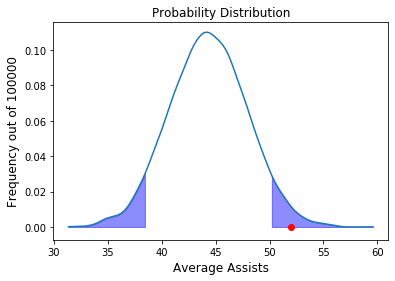

In [42]:
normal_dist = np.random.normal(size=10000, loc=assist['AST'].mean(), scale=sem) 
values = pd.Series(normal_dist)
kde = stats.gaussian_kde(values)
pos = np.linspace(np.min(values), np.max(values), 10000)
plt.plot(pos, kde(pos))
plt.xlabel('Average Assists', fontsize=12)
plt.ylabel('Frequency out of 100000', fontsize=12)
plt.title('Probability Distribution')
a05pos = np.mean(values) + np.std(values)*1.645
a05neg = np.mean(values) - np.std(values)*1.645
shade = np.linspace(a05pos, normal_dist.max(), 300)
plt.fill_between(shade, kde(shade), alpha=0.45, color='blue')
shade2 = np.linspace(a05neg, normal_dist.min(), 300)
plt.fill_between(shade2, kde(shade2), alpha=0.45, color='blue')
plt.scatter(x=52,y=0,color = 'r')
plt.plot()
print('The mean of the NBA combined with the WNBA is within the critical zones.')

# Bonus: Satisfying your curiosity

You finally managed to solve your family's debates over basketball! While you were doing that you started to take an interest in the normal distribution.

You read that the normal distribution is present in a lot of natural phenomenons, like blood pressure, IQ, weight and height. If, for example, we could plot the distribution of the weights of every human on the planet right now it would have the shape of a normal distribution.

In light of this you would like to see if it's possible to check if the distribution of the weights of the WNBA players is a sample distribution that comes from a population that has a normal distribution, because theoretically this should be the case.

**How would you try to demonstrate that our sample fits a normal distribution? What kind of test would you use? Would you have to make any assumptions?**

In [ ]:
#your-answer-here

In [ ]:
# your code here

**What are your comments in regards to the results of the test?**

In [ ]:
#your-answer-here